# Noising Experiments for q = 0 and Poisson Noise


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from utils.images_generator import normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image
from utils.experiments_functions import get_img_info
from itertools import combinations
from skimage import data
from skimage.color import rgb2gray
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
from matplotlib.legend_handler import HandlerBase

--------------------------

## SKIMAGE IMAGES

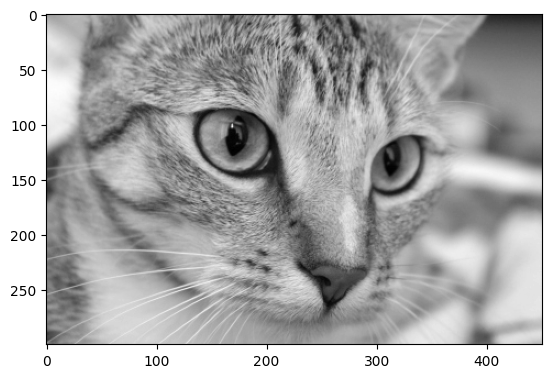

In [2]:
astronaut_image = data.cat()
astronaut_image = rgb2gray(astronaut_image)
plt.imshow(astronaut_image, cmap='gray')

In [9]:
skimage_data = pd.read_csv(f"results/noise_analysis/poisson/poisson_analysis_skimage_noisegen_normalized.csv")
skimage_data

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_factor
0,0,0.226687,0.149256,0.942420,0.066415,0.560020,0.294618,0.145362,data.astronaut,0.00
1,0,0.177204,0.116900,0.959459,0.045795,0.510537,0.303181,0.186281,data.astronaut,0.05
2,0,0.162927,0.106521,0.963080,0.041216,0.496260,0.305131,0.198609,data.astronaut,0.10
3,0,0.146241,0.095741,0.966373,0.036877,0.479575,0.308083,0.212342,data.astronaut,0.20
4,0,0.137111,0.086856,0.967625,0.035043,0.470445,0.308206,0.221349,data.astronaut,0.30
...,...,...,...,...,...,...,...,...,...,...
58,0,0.020643,0.021744,0.989722,0.013169,0.353976,0.333884,0.312140,data.coins,10.00
59,0,0.019398,0.018787,0.984145,0.020221,0.352731,0.333028,0.314241,data.coins,15.00
60,0,0.022156,0.014317,0.979031,0.026474,0.355489,0.329414,0.315097,data.coins,20.00
61,0,0.028432,0.012294,0.966494,0.041740,0.361766,0.325264,0.312970,data.coins,30.00


In [10]:
skimage_data[['image_name', 'noise_factor', 'Smoothness', 'Curve structure', 'Weighted Entropy Correct', 'Weighted Complexity Correct']].head(21)


,image_name,noise_factor,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct
0,data.astronaut,0.00,0.226687,0.149256,0.942420,0.066415
1,data.astronaut,0.05,0.177204,0.116900,0.959459,0.045795
2,data.astronaut,0.10,0.162927,0.106521,0.963080,0.041216
3,data.astronaut,0.20,0.146241,0.095741,0.966373,0.036877
4,data.astronaut,0.30,0.137111,0.086856,0.967625,0.035043
5,data.astronaut,0.50,0.126971,0.072717,0.968555,0.033404
6,data.astronaut,0.75,0.119920,0.069029,0.968484,0.033105
7,data.astronaut,1.00,0.115317,0.061232,0.968289,0.033069
8,data.astronaut,1.50,0.108121,0.052581,0.967509,0.033465
9,data.astronaut,2.00,0.106631,0.049896,0.965693,0.035122


In [11]:
q_value = 0
skimage_data = skimage_data[(skimage_data['q'] == q_value)]

In [5]:
skimage_data['noise_factor'].unique()

array([ 0.  ,  0.05,  0.1 ,  0.2 ,  0.3 ,  0.5 ,  0.75,  1.  ,  1.5 ,
        2.  ,  2.5 ,  3.  ,  4.  ,  5.  ,  6.  ,  8.  , 10.  , 15.  ,
       20.  , 30.  , 50.  ])

In [6]:
skimage_data['image_name'].unique()

array(['data.astronaut', 'data.cat', 'data.coins'], dtype=object)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_14528\460179141.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


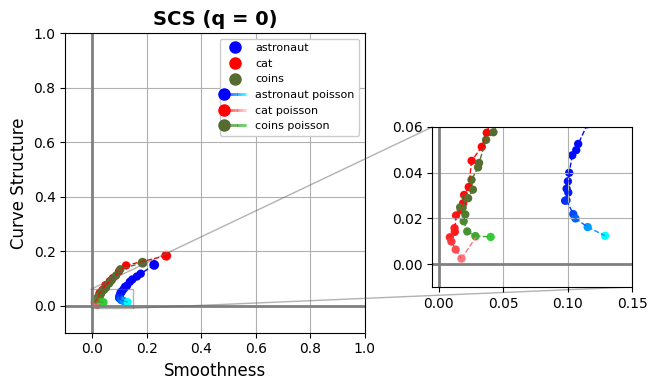

In [12]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}

unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([0.8, 0.27, 0.4, 0.4])
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_skimage_images):
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    base_name = imageName.split('.')[1]
    
    # Process noise_factor data with gradient
    df_noised_sd = df_data_filtered.sort_values('noise_factor')
    
    if len(df_noised_sd) >= 2:
        x = df_noised_sd['Smoothness'].values
        y = df_noised_sd['Curve structure'].values
        sd = df_noised_sd['noise_factor'].values
        
        # Create gradient line collection
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise_sd"]
        cmap = mcolors.LinearSegmentedColormap.from_list(f"{base_name}_cmap", [original_color, noise_color])
        norm = plt.Normalize(vmin=sd.min(), vmax=sd.max())
        
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='--', linewidth=1)
            lc.set_array(sd)
            ax.add_collection(lc)
        
        # Gradient scatter points
        colors = cmap(norm(sd))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o')
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Original data point
    df_no_noise = df_data_filtered[df_data_filtered['noise_factor'] == 0]
    original_color = figname_to_color[imageName]
    ax_main.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 
                   c=original_color, edgecolors='none', marker='o', s=50)
    axins.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 
                 c=original_color, edgecolors='none', marker='o', s=50)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=f"{base_name}", markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{imageName.split('.')[1]} poisson" for imageName in unique_skimage_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8
)

# Configure axes
ax_main.set_title(f'SCS (q = {q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Smoothness', fontsize=12)
ax_main.set_ylabel('Curve Structure', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')
ax_main.grid(True)
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')

# Inset configuration
x1, x2, y1, y2 = -0.005, 0.15, -0.01, 0.06
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_aspect('auto')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/poisson/poisson_skimage_scs_q{q_value}_noisegen_norm.png', bbox_inches='tight')
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_14528\1171079212.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


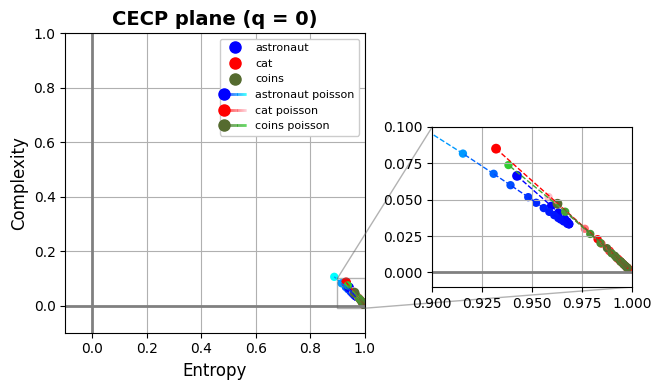

In [13]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}

unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([0.8, 0.27, 0.4, 0.4])
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_skimage_images):
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    base_name = imageName.split('.')[1]
    
    # Process noise_factor data with gradient
    df_noised_sd = df_data_filtered.sort_values('noise_factor')
    
    if len(df_noised_sd) >= 2:
        x = df_noised_sd['Weighted Entropy Correct'].values
        y = df_noised_sd['Weighted Complexity Correct'].values
        sd = df_noised_sd['noise_factor'].values
        
        # Create gradient line collection
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise_sd"]
        cmap = mcolors.LinearSegmentedColormap.from_list(f"{base_name}_cmap", [original_color, noise_color])
        norm = plt.Normalize(vmin=sd.min(), vmax=sd.max())
        
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='--', linewidth=1)
            lc.set_array(sd)
            ax.add_collection(lc)
        
        # Gradient scatter points
        colors = cmap(norm(sd))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o')
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Original data point
    df_no_noise = df_data_filtered[df_data_filtered['noise_factor'] == 0]
    original_color = figname_to_color[imageName]
    ax_main.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 
                   c=original_color, edgecolors='none', marker='o', s=50)
    axins.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 
                 c=original_color, edgecolors='none', marker='o', s=50)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=f"{base_name}", markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{imageName.split('.')[1]} poisson" for imageName in unique_skimage_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8
)

# Configure axes
ax_main.set_title(f'CECP plane (q = {q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Entropy', fontsize=12)
ax_main.set_ylabel('Complexity', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')
ax_main.grid(True)
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')

# Inset configuration
x1, x2, y1, y2 = 0.9, 1, -0.01, 0.1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_aspect('auto')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/poisson/poisson_skimage_cecp_q{q_value}_noisegen_norm.png', bbox_inches='tight')
plt.show()

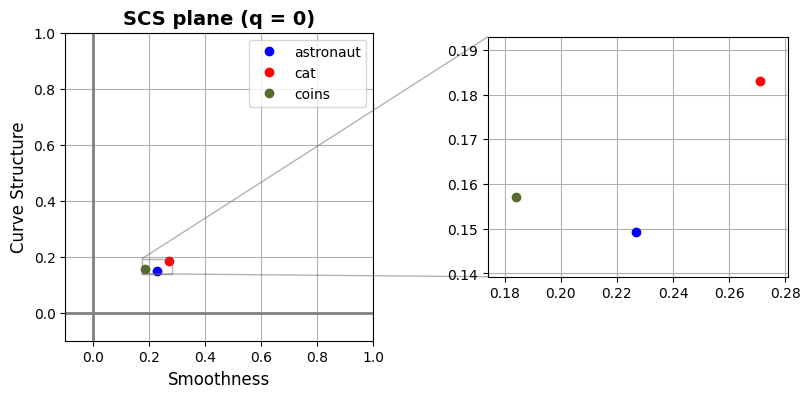

In [10]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}
unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5, 4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    # df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    # ax_main.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    # axins.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    # get data varying mean and setting sd as 0
    # df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
    # ax_main.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    # axins.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q = {q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Smoothness', fontsize=12)
ax_main.set_ylabel('Curve Structure', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
ax_main.grid(True)
ax_main.legend()
df_no_noise = skimage_data[(skimage_data['sd_value'] == 0) & (skimage_data['mean_value'] == 0)]
x1, x2 = np.min(df_no_noise['Smoothness'])-0.01, np.max(df_no_noise['Smoothness'])+0.01
y1, y2 = np.min(df_no_noise['Curve structure'])-0.01, np.max(df_no_noise['Curve structure'])+0.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
# plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/scs_skimage.png', bbox_inches='tight')
# Show the plot
plt.show()

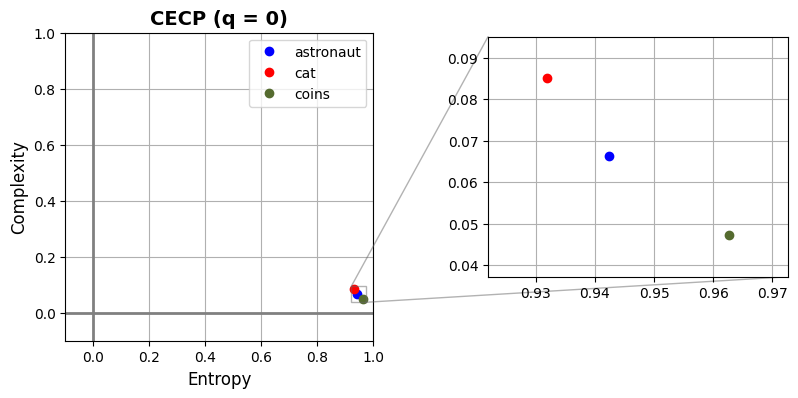

In [8]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise_sd': 'cyan',
    'data.astronaut_noise_mean': 'darkviolet',
    'data.cat': 'red',
    'data.cat_noise_sd': 'pink',
    'data.cat_noise_mean': 'sienna',
    'data.coins': 'darkolivegreen',
    'data.coins_noise_sd': 'limegreen',
    'data.coins_noise_mean': 'yellow'
}
unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5, 4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # get data varying sd and setting mean as 0
    # df_noised_sd = df_data_filtered[df_data_filtered['mean_value'] == 0]
    # ax_main.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    # axins.plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise_sd"], label=f"{imageName.split('.')[1]} gaussian")
    # get data varying mean and setting sd as 0
    # df_noised_mean = df_data_filtered[df_data_filtered['sd_value'] == 0]
    # ax_main.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    # axins.plot(df_noised_mean['Smoothness'], df_noised_mean['Curve structure'], '*k--', c=figname_to_color[f"{imageName}_noise_mean"], label=f"{imageName} Gaussian mean")
    
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['sd_value'] == 0) & (df_data_filtered['mean_value'] == 0)]
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])

# Set title and labels for the subplot
ax_main.set_title(f'CECP (q = {q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Entropy', fontsize=12)
ax_main.set_ylabel('Complexity', fontsize=12)
ax_main.set_xlim([-0.1, 1.0])
ax_main.set_ylim([-0.1, 1.0])
ax_main.set_aspect('equal')
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
ax_main.grid(True)
ax_main.legend()
df_no_noise = skimage_data[(skimage_data['sd_value'] == 0) & (skimage_data['mean_value'] == 0)]
x1, x2 = np.min(df_no_noise['Weighted Entropy Correct'])-0.01, np.max(df_no_noise['Weighted Entropy Correct'])+0.01
y1, y2 = np.min(df_no_noise['Weighted Complexity Correct'])-0.01, np.max(df_no_noise['Weighted Complexity Correct'])+0.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
# plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/cecp_skimage.png', bbox_inches='tight')
# Show the plot
plt.show()